<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [2]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import roots_legendre
from scipy.optimize import newton

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules.


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A)
Define a class for all quadrature techniques.

In [26]:
class Quadrature:
    def __init__(self, k, start, end, intervals):
        self.k = k
        self.start = start
        self.end = end
        self.intervals = intervals
        self.h = (end - start) / intervals


## B)
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs.

In [4]:
# Midpoint Rule as a subclass of Quadrature
class MidpointRule(Quadrature):
    def compute(self):
        total = 0
        for i in range(self.intervals):
            midpoint = self.start + (i + 0.5) * self.h
            total += midpoint**self.k
        return total * self.h


# Trapezoidal Rule as a subclass of Quadrature
class TrapezoidalRule(Quadrature):
    def compute(self):
        total = (self.start**self.k + self.end**self.k) / 2.0
        for i in range(1, self.intervals):
            total += (self.start + i * self.h)**self.k
        return total * self.h


# Simpson Rule as a subclass of Quadrature
class SimpsonRule(Quadrature):
    def compute(self):
        total = self.start**self.k + self.end**self.k
        for i in range(1, self.intervals, 2):
            total += 4 * (self.start + i * self.h)**self.k
        for i in range(2, self.intervals - 1, 2):
            total += 2 * (self.start + i * self.h)**self.k
        return total * self.h / 3


<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br>
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br>
You should get something like this:
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5].

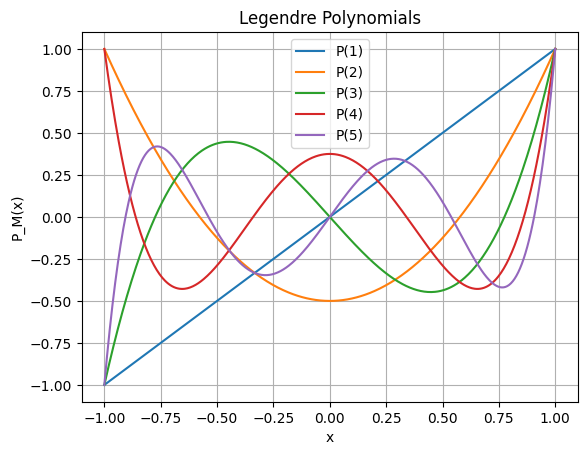

{2.350402387287568}


In [28]:
class Quad_:
    def __init__(self, func, start, end, intervals):
        self.func = func
        self.start = start
        self.end = end
        self.intervals = intervals

class Gauss_Quad_(Quad_):

    def __init__(self, function, start, end, intervals, order):
        super().__init__(function, start, end, intervals)
        self.order = order

###########################################################################

    def leg_poly(self, x, order):

        if order == 0:
            return np.ones_like(x)
        elif order == 1:
            return x

        P0, P1 = np.ones_like(x), x
        for n in range(2, order + 1):
            Pn = ((2 * n - 1) * x * P1 - (n - 1) * P0) / n
            P0, P1 = P1, Pn
        return Pn

    def plot_lp(self, orders):

        x = np.linspace(-1, 1, 500)
        for m in orders:
            plt.plot(x, self.leg_poly(x, m), label=f'P({m})')

        plt.title('Legendre Polynomials')
        plt.xlabel('x')
        plt.ylabel('P_M(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

###################################E###########################################

    def ld(self, x, order):

        return (x * self.leg_poly(x, order) - order * self.leg_poly(x, order - 1)) / (x**2 - 1)

    def newton_method_root(self, order):

        x = np.cos(np.pi * (np.arange(1, order + 1) - 0.25) / (order + 0.5))
        while True:
            dx = self.leg_poly(x, order) / self.ld(x, order)
            x -= dx
            if np.all(np.abs(dx) < 1e-15):
                break
        w = 2 / ((1 - x**2) * self.ld(x, order)**2)
        return x, w

    def output_roots_weights(self, max_order, filename="roots_weights.txt"):

        with open(filename, "w") as file:
            for m in range(1, max_order + 1):
                # Using Newton's method
                roots_newton, weights_newton = self.newton_method_root(m)
                file.write(f"Order {m} (Newton's Method):\nRoots: {roots_newton}\nWeights: {weights_newton}\n\n")

###################################F###########################################

                # Using Scipy's roots_legendre
                roots_scipy, weights_scipy = self.scipy_method_root(m)
                file.write(f"Order {m} (Scipy's roots_legendre):\nRoots: {roots_scipy}\nWeights: {weights_scipy}\n\n")

    def scipy_method_root(self, order):

        roots, weights = roots_legendre(order)
        return roots, weights

###################################G###########################################

    def gauss_quad(self):

        loc, weights = self.newton_method_root(self.order)
        gq = 0
        for i in range(self.order):
            gq += weights[i] * self.func(loc[i])
        return gq

#################################TEST###########################################

a = 0
b = 1
N = 5
order = 100

def qin(x):
    return np.exp(x)

quad = Gauss_Quad_(qin, a, b, N, order)

quad.plot_lp(orders=[1, 2, 3, 4, 5])

quad.output_roots_weights(max_order=5)

gq = quad.gauss_quad()

print({gq})


<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br>
$$P_M(x)=0.$$
 <br>
To numerically find those roots (M of them), we can use the Newton's method:
 <br>
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br>
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$.

## E)
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5].

## F)
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [ ]:
#yes

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature.

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature,
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature,
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$:

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





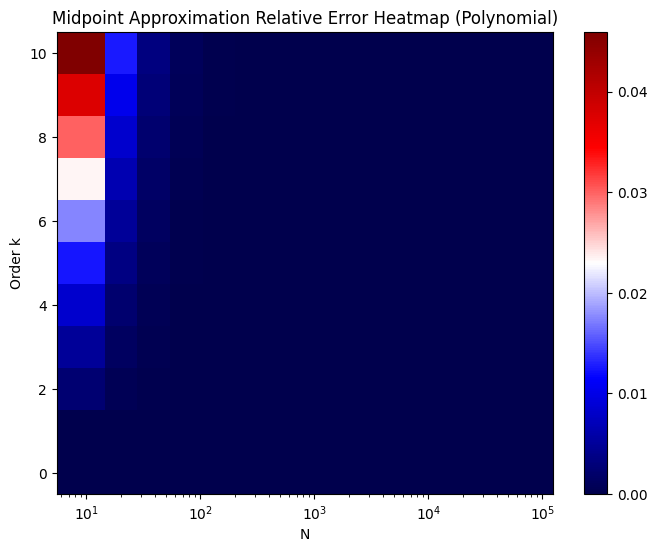

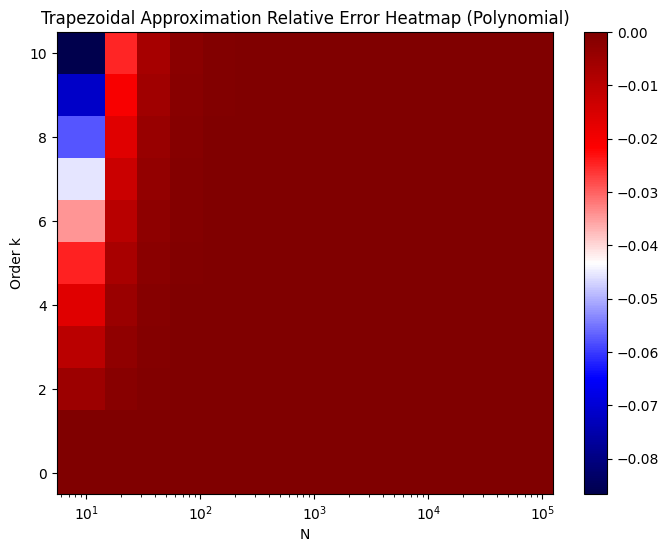

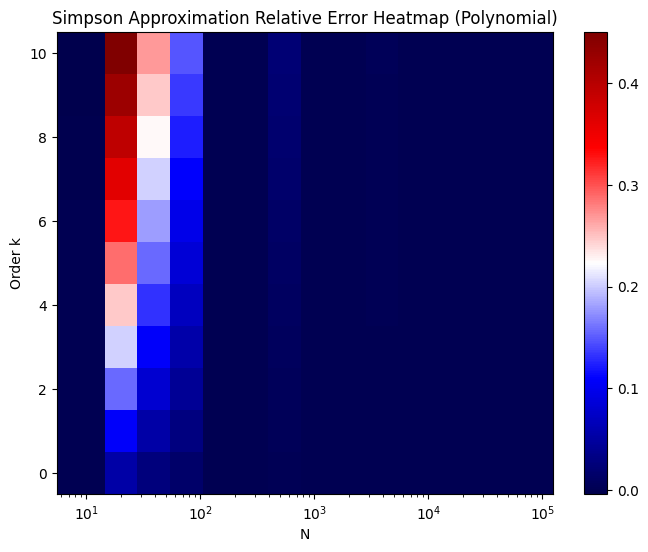

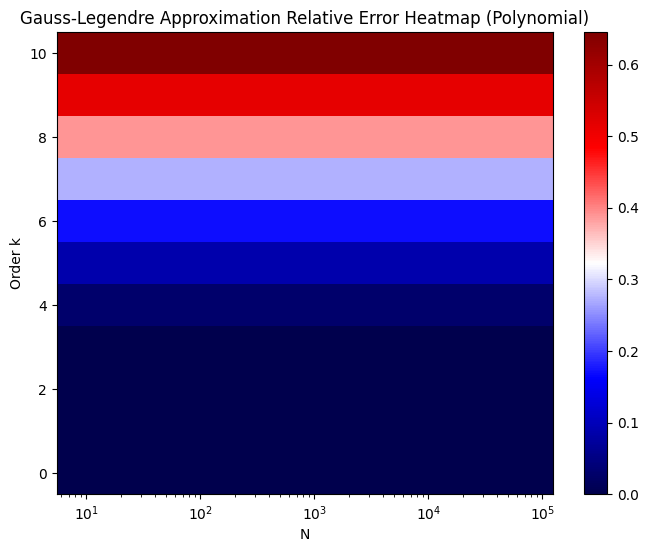

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

# Define a general Quadrature class
class Quadrature:
    def __init__(self, k, start, end, intervals):
        self.k = k
        self.start = start
        self.end = end
        self.intervals = intervals
        self.h = (end - start) / intervals

    # Define a polynomial integral function
    def poly_integral(self):
        return self.end**(self.k+1) / (self.k+1) - self.start**(self.k+1) / (self.k+1)

    # Define a function to calculate relative error
    @staticmethod
    def relative_error(true_value, approx_value):
        return 2 * (true_value - approx_value) / (true_value + approx_value)


# Midpoint Rule as a subclass of Quadrature
class MidpointRule(Quadrature):
    def compute(self):
        total = 0
        for i in range(self.intervals):
            midpoint = self.start + (i + 0.5) * self.h
            total += midpoint**self.k
        return total * self.h


# Trapezoidal Rule as a subclass of Quadrature
class TrapezoidalRule(Quadrature):
    def compute(self):
        total = (self.start**self.k + self.end**self.k) / 2.0
        for i in range(1, self.intervals):
            total += (self.start + i * self.h)**self.k
        return total * self.h


# Simpson Rule as a subclass of Quadrature
class SimpsonRule(Quadrature):
    def compute(self):
        total = self.start**self.k + self.end**self.k
        for i in range(1, self.intervals, 2):
            total += 4 * (self.start + i * self.h)**self.k
        for i in range(2, self.intervals - 1, 2):
            total += 2 * (self.start + i * self.h)**self.k
        return total * self.h / 3


# Gauss-Legendre Quadrature as a separate class
class GaussLegendreQuadrature(Quadrature):
    def compute(self):
        roots, weights = roots_legendre(2)  # Assuming order 2 for demonstration
        rescaled_roots = 0.5 * (1 + roots)
        return sum(weights * rescaled_roots**self.k) / 2


# Function for generating heatmaps
def generate_heatmap(results, method_name, ks, Ns):
    plt.figure(figsize=(8, 6))
    plt.title(f'{method_name} Approximation Relative Error Heatmap (Polynomial)')
    plt.xlabel('N')
    plt.ylabel('Order k')
    plt.xscale('log')
    plt.pcolormesh(Ns, ks, results, shading='nearest', cmap='seismic')
    plt.colorbar()
    plt.show()


# Main Execution
ks = range(11)
Ns = np.geomspace(10, 10**5, num=15).astype(int)

# Preparing arrays to store results
results = {
    'Midpoint': np.zeros((len(ks), len(Ns))),
    'Trapezoidal': np.zeros((len(ks), len(Ns))),
    'Simpson': np.zeros((len(ks), len(Ns))),
    'Gauss-Legendre': np.zeros((len(ks), len(Ns)))
}

# Calculation and storing results
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        # Compute true integral value
        quad = Quadrature(k, 0, 1, N)
        true_value = quad.poly_integral()

        # Calculate and store errors for each method
        for method_name, method_class in [('Midpoint', MidpointRule), ('Trapezoidal', TrapezoidalRule),
                                          ('Simpson', SimpsonRule), ('Gauss-Legendre', GaussLegendreQuadrature)]:
            quad_method = method_class(k, 0, 1, N)
            approx_value = quad_method.compute()
            results[method_name][i, j] = Quadrature.relative_error(true_value, approx_value)

# Generate heatmaps
Ns_grid, ks_grid = np.meshgrid(Ns, ks)
for method_name in results:
    generate_heatmap(results[method_name], method_name, ks_grid, Ns_grid)


## H) Fermi–Dirac


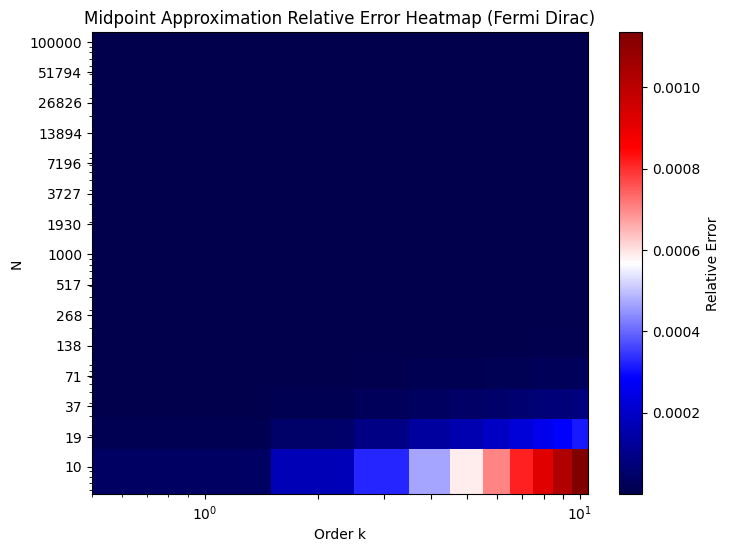

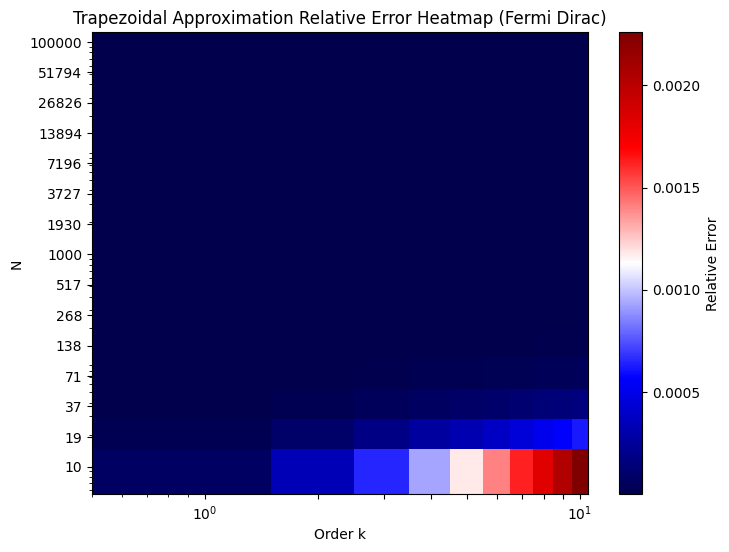

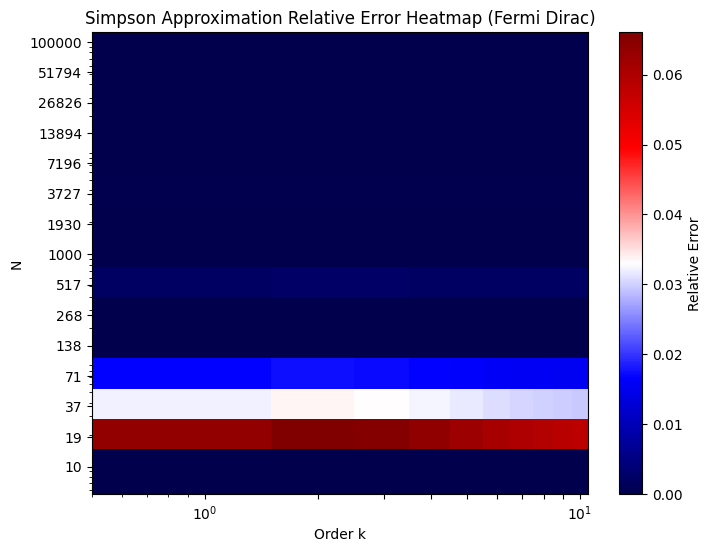

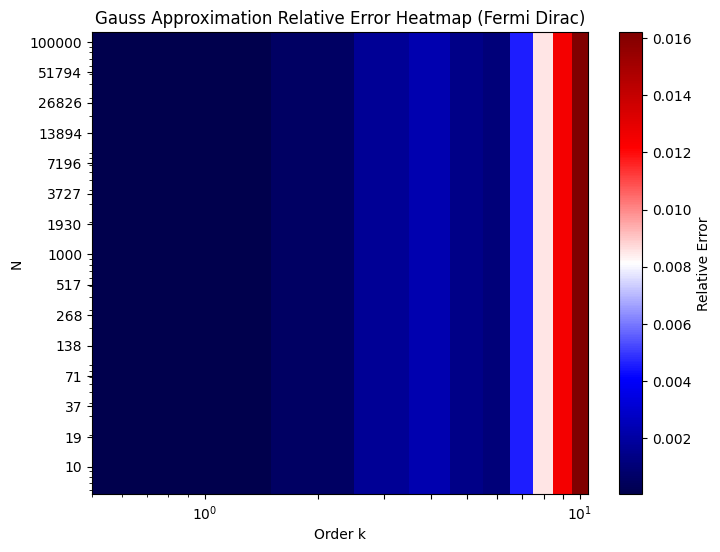

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

# Base class for Fermi-Dirac integrand and integral
class FermiDirac:
    def __init__(self, k, a, b, N):
        self.k = k
        self.a = a
        self.b = b
        self.N = N
        self.h = (b - a) / N

    def integrand(self, x):
        return 1 / (1 + np.exp(-self.k * x))

    def true_integral(self):
        return (1 / self.k) * (np.log(np.exp(self.k * self.b) + 1) - np.log(np.exp(self.k * self.a) + 1))

    @staticmethod
    def relative_error(true_value, approx_value):
        return 2 * abs(true_value - approx_value) / (abs(true_value) + abs(approx_value))

# Midpoint Rule as a subclass
class MidpointRule(FermiDirac):
    def compute(self):
        total = 0
        for i in range(self.N):
            midpoint = self.a + (i + 0.5) * self.h
            total += self.integrand(midpoint)
        return total * self.h

# Trapezoidal Rule as a subclass
class TrapezoidalRule(FermiDirac):
    def compute(self):
        total = (self.integrand(self.a) + self.integrand(self.b)) / 2
        for i in range(1, self.N):
            total += self.integrand(self.a + i * self.h)
        return total * self.h

# Simpson Rule as a subclass
class SimpsonRule(FermiDirac):
    def compute(self):
        total = self.integrand(self.a) + self.integrand(self.b)
        for i in range(1, self.N, 2):
            total += 4 * self.integrand(self.a + i * self.h)
        for i in range(2, self.N - 1, 2):
            total += 2 * self.integrand(self.a + i * self.h)
        return total * self.h / 3

# Gauss Quadrature as a separate class
class GaussQuadrature(FermiDirac):
    def compute(self):
        roots, weights = roots_legendre(2)  # Order 2 for Gauss-Legendre Quadrature
        transformed_roots = 0.5 * (1 + roots)  # Rescale roots to [0, 1]
        return np.sum(weights * self.integrand(transformed_roots)) / 2

# Function for plotting heatmaps
def plot_heatmap(data, title, ks, Ns):
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(ks, Ns, data, shading='nearest', cmap='seismic')
    plt.colorbar(label='Relative Error')
    plt.title(title)
    plt.xlabel('Order k')
    plt.ylabel('N')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(ks)
    plt.yticks(Ns, labels=[str(n) for n in Ns])
    plt.show()

# Main Execution
ks = np.arange(1, 11)
Ns = np.geomspace(10, 1e5, num=15).astype(int)

# Initialize arrays to hold the relative errors
results = {
    'Midpoint': np.zeros((len(Ns), len(ks))),
    'Trapezoidal': np.zeros((len(Ns), len(ks))),
    'Simpson': np.zeros((len(Ns), len(ks))),
    'Gauss': np.zeros((len(Ns), len(ks)))
}

# Calculate quadratures and relative errors
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        # Instantiate the Fermi-Dirac class for each method
        methods = {
            'Midpoint': MidpointRule(k, 0, 1, N),
            'Trapezoidal': TrapezoidalRule(k, 0, 1, N),
            'Simpson': SimpsonRule(k, 0, 1, N),
            'Gauss': GaussQuadrature(k, 0, 1, N)
        }

        true_value = methods['Midpoint'].true_integral()  # True integral value

        # Compute and store errors for each method
        for method_name, method in methods.items():
            approx_value = method.compute()
            results[method_name][j, i] = method.relative_error(true_value, approx_value)

# Plot heatmaps for each method
for method_name in results:
    plot_heatmap(results[method_name], f'{method_name} Approximation Relative Error Heatmap (Fermi Dirac)', ks, Ns)


<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [18]:
from scipy.integrate import quad

def pot_en(x):

    return x**4

def speriod(x, amp):

    return 1 / np.sqrt(pot_en(amp) - pot_en(x))

def calc_per(amp, mass):

    integral, _ = quad(speriod, 0, amp, args=(amp,))
    period = np.sqrt(8 * mass) * integral
    return period

amp = 2
mass = 1.0
period = calc_per(amp, mass)
print(f"Period for amp {amp} and mass {mass}: {period}")


Period for amp 2 and mass 1.0: 1.854074677301701


## B)
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [17]:
import numpy as np
from scipy.integrate import fixed_quad

class HarmOsc:

    def __init__(self, amp, terr):
        self.amp = amp
        self.terr = terr
        self.N = 2

    def pot_en_(self, x):

        return x**4

    def speriod(self, x):

        return 1 / np.sqrt(self.pot_en_(self.amp) - self.pot_en_(x))

    def perioderr(self):

        result, _ = fixed_quad(self.speriod, 0, self.amp, n=self.N)
        T = np.sqrt(8) * result

        result_2N, _ = fixed_quad(self.speriod, 0, self.amp, n=2*self.N)
        T_2N = np.sqrt(8) * result_2N


        error = np.abs(T - T_2N)
        return T, error

    def iterative_calculation_(self):
        ''' Iteratively calculate period until the target error is achieved '''
        while True:
            period, error = self.perioderr()
            print(f'N: {self.N}, T: {period}, err: {error}')

            if error < self.terr:
                break

            self.N *= 2

amp = 2.0
terr = 1e-4
oscillator = HarmOsc(amp, terr)
oscillator.iterative_calculation_()


N: 2, T: 1.6108746163618466, err: 0.10686891159115475
N: 4, T: 1.7177435279530013, err: 0.0639707774321574
N: 8, T: 1.7817143053851587, err: 0.0350567498506027
N: 16, T: 1.8167710552357614, err: 0.018361179742043765
N: 32, T: 1.8351322349778052, err: 0.009397320528150566
N: 64, T: 1.8445295555059558, err: 0.004753929257606648
N: 128, T: 1.8492834847635624, err: 0.002390918736097536
N: 256, T: 1.85167440349966, err: 0.0011989650549499853
N: 512, T: 1.85287336855461, err: 0.0006003611044518298
N: 1024, T: 1.8534737296590618, err: 0.0003004003154996049
N: 2048, T: 1.8537741299745614, err: 0.00015025544730740137
N: 4096, T: 1.8539243854218688, err: 7.514166762612184e-05


## C)
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [45]:
import numpy as np
from scipy.integrate import quad

class HarmOscQuad_:

    def __init__(self, amp):

        self.amp = amp

    def pot_en_(self, x):

        return x**4

    def speriod(self, x, amp):
        ''' Integrand for the time period calculation '''
        return 1 / np.sqrt(self.pot_en_(amp) - self.pot_en_(x))


    def qperioderr(self):
        ''' Calculate the period and error using quad '''
        result, error = quad(self.speriod, 0, self.amp, args=(self.amp,))
        T = np.sqrt(8) * result
        return T, error

    def display_results_(self):
        ''' Calculate the period using quad and print the results '''
        period_quad, error_quad = self.qperioderr()
        print(f'advanced period: {period_quad}, err: {error_quad}')

# Example usage
amp = 2.0
oscillator = HarmOscQuad_(amp)
oscillator.display_results_()


advanced period: 3.708149354603402, err: 1.419033779370693e-10


 ## D)
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration.
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why?

In [48]:
def per_romberg(a):

    result = romberg(speriod, 0, a, args=(a,))
    T = np.sqrt(8) * result

    return T

# Given amplitude
amplitude = 2.0

# Calculate the period using romberg

period_romberg = per_romberg(amplitude)

# Print the result
print(f'Period using romberg: {period_romberg}')
#divide by zero...0

Period using romberg: nan


<ipython-input-18-63c86766fc14>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(pot_en(amp) - pot_en(x))


## E)
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [49]:
import numpy as np
from scipy.integrate import romberg

# Define a class for the potential function
class Potential:
    def __init__(self, amplitude):
        self.amplitude = amplitude

    def V(self, x):
        return x**4

    def integrand(self, x, a):
        if x == a:
            return 0
        else:
            return 1 / np.sqrt(self.V(a) - self.V(x))

# Define a class for calculating the period using Romberg Integration
class RombergPeriodCalculator:
    def __init__(self, potential, m=1):
        self.potential = potential
        self.m = m

    def calculate_period(self, divmax, tol):
        integral = romberg(self.potential.integrand, 0, self.potential.amplitude,
                           args=(self.potential.amplitude,), divmax=divmax, tol=tol, show=True)
        T = np.sqrt(8 * self.m) * integral
        return T

# Main Execution
amplitude = 2
tolerance = 1e-5
divmax = 10

potential = Potential(amplitude)
calculator = RombergPeriodCalculator(potential)

integral_divmax = calculator.calculate_period(divmax, tolerance)
integral_divmax2 = calculator.calculate_period(divmax*2, tolerance)

estimated_error = np.abs(integral_divmax - integral_divmax2)
print(f"error estimate for {divmax} is {estimated_error}")


Romberg integration of <function vectorize1.<locals>.vfunc at 0x7cb584793be0> from [0, 2]

 Steps  StepSize   Results
     1  2.000000  0.250000 
     2  1.000000  0.383199  0.427599 
     4  0.500000  0.468030  0.496307  0.500888 
     8  0.250000  0.524701  0.543592  0.546744  0.547472 
    16  0.125000  0.563631  0.576608  0.578809  0.579318  0.579443 
    32  0.062500  0.590760  0.599802  0.601349  0.601706  0.601794  0.601816 
    64  0.031250  0.609802  0.616150  0.617239  0.617492  0.617554  0.617569  0.617573 
   128  0.015625  0.623218  0.627690  0.628459  0.628637  0.628681  0.628692  0.628695  0.628695 
   256  0.007812  0.632687  0.635843  0.636387  0.636513  0.636543  0.636551  0.636553  0.636554  0.636554 
   512  0.003906  0.639376  0.641606  0.641990  0.642079  0.642101  0.642106  0.642108  0.642108  0.642108  0.642108 
  1024  0.001953  0.644104  0.645680  0.645952  0.646015  0.646030  0.646034  0.646035  0.646035  0.646035  0.646035  0.646035 

The final result is 0.6

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [51]:
import numpy as np
from scipy.integrate import romberg

# Define a class for the potential function
class Potential:
    def __init__(self, amplitude):
        self.amplitude = amplitude

    def V(self, x):
        return x**4

    def integrand(self, x, a):
        if x == a:
            return 0
        else:
            return 1 / np.sqrt(self.V(a) - self.V(x))

# Define a class for calculating the period using Romberg Integration
class RombergPeriodCalculator:
    def __init__(self, potential, m=1):
        self.potential = potential
        self.m = m

    def calculate_period(self, divmax, tol):
        integral = romberg(self.potential.integrand, 0, self.potential.amplitude,
                           args=(self.potential.amplitude,), divmax=divmax, tol=tol, show=True)
        T = np.sqrt(8 * self.m) * integral
        return T

# Main Execution
amplitude = 2
tolerance = 1e-5
divmax = 15

potential = Potential(amplitude)
calculator = RombergPeriodCalculator(potential)

integral_divmax = calculator.calculate_period(divmax, tolerance)
integral_divmax2 = calculator.calculate_period(divmax*2, tolerance)

estimated_error = np.abs(integral_divmax - integral_divmax2)
print(f"error estimate for {divmax} is {estimated_error}")


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (15) exceeded. Latest difference = 6.940724e-04
  warnings.warn(


Romberg integration of <function vectorize1.<locals>.vfunc at 0x7cb5828b7130> from [0, 2]

 Steps  StepSize   Results
     1  2.000000  0.250000 
     2  1.000000  0.383199  0.427599 
     4  0.500000  0.468030  0.496307  0.500888 
     8  0.250000  0.524701  0.543592  0.546744  0.547472 
    16  0.125000  0.563631  0.576608  0.578809  0.579318  0.579443 
    32  0.062500  0.590760  0.599802  0.601349  0.601706  0.601794  0.601816 
    64  0.031250  0.609802  0.616150  0.617239  0.617492  0.617554  0.617569  0.617573 
   128  0.015625  0.623218  0.627690  0.628459  0.628637  0.628681  0.628692  0.628695  0.628695 
   256  0.007812  0.632687  0.635843  0.636387  0.636513  0.636543  0.636551  0.636553  0.636554  0.636554 
   512  0.003906  0.639376  0.641606  0.641990  0.642079  0.642101  0.642106  0.642108  0.642108  0.642108  0.642108 
  1024  0.001953  0.644104  0.645680  0.645952  0.646015  0.646030  0.646034  0.646035  0.646035  0.646035  0.646035  0.646035 
  2048  0.000977  0.6474

KeyboardInterrupt: ignored

## G)
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.924214e-01
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.621070e-02
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 6.414047e-02
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.810535e-02
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.848428e-02
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.207023e-02
  warnings.warn(
/usr

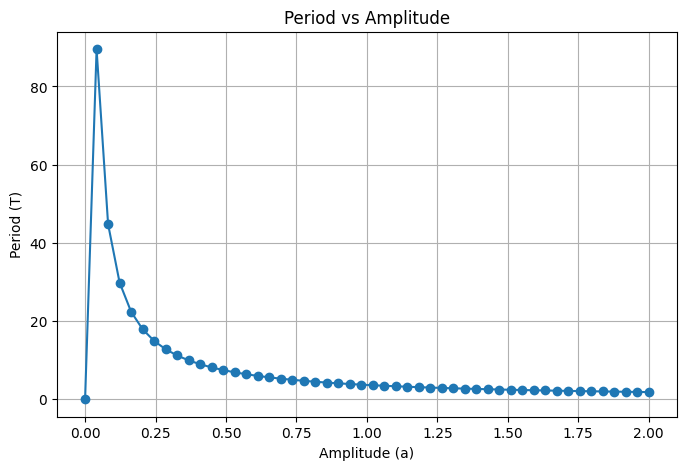

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import romberg

class Potential:
    def __init__(self, amplitude):
        self.amplitude = amplitude

    def V(self, x):
        return x**4

    def integrand(self, x, a):
        if x == a:
            return 0
        else:
            return 1 / np.sqrt(self.V(a) - self.V(x))

class RombergPeriodCalculator:
    def __init__(self, potential, m=1):
        self.potential = potential
        self.m = m

    def calculate_period(self, divmax, tol):
        integral = romberg(self.potential.integrand, 0, self.potential.amplitude,
                           args=(self.potential.amplitude,), divmax=divmax, tol=tol, show=False)
        T = np.sqrt(8 * self.m) * integral
        return T

def plot_period_vs_amplitude(amplitudes, periods):
    plt.figure(figsize=(8, 5))
    plt.plot(amplitudes, periods, '-o')
    plt.xlabel('Amplitude (a)')
    plt.ylabel('Period (T)')
    plt.title('Period vs Amplitude')
    plt.grid(True)
    plt.show()

# Main execution
amplitudes = np.linspace(0, 2, 50)
periods = []

tolerance = 1e-5
divmax = 10

for amp in amplitudes:
    potential = Potential(amp)
    calculator = RombergPeriodCalculator(potential)
    period = calculator.calculate_period(divmax, tolerance)
    periods.append(period)

plot_period_vs_amplitude(amplitudes, periods)


<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A)
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [42]:
k = 1.38064852e-23
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'

    return (z / (1-z))**3 / (np.exp(z / (1-z))-1) / (1 - z)**2

z_value=0.5
result=blackbody_var(z_value)
print(result)

2.327906827477306


## B)
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [41]:

import numpy as np
from scipy import integrate

# Constants
k = 1.38064852e-23
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)

# Define the intgr function
def intgr(z):
    return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))

# Calculate the Stefan-Boltzmann constant (sigma) using 'fixed_quad'
result, _ = integrate.fixed_quad(lambda z: intgr(z), 0, 1)

# Calculate sigma
sigma = prefactor * result

# Compare with the known Stefan-Boltzmann constant value
stefan_boltzmann_constant = 5.670367e-8

# Print the result and the comparison
print("Calculated Stefan-Boltzmann constant:", sigma)
print("Known Stefan-Boltzmann constant:", stefan_boltzmann_constant)


Calculated Stefan-Boltzmann constant: 5.97459477974443e-08
Known Stefan-Boltzmann constant: 5.670367e-08


## C)
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [40]:
import numpy as np
from scipy import integrate

# Constants
k = 1.38064852e-23
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)

# Define the intgr function
def intgr(x):
    return x**3 / (np.exp(x) - 1)

# Calculate the Stefan-Boltzmann constant (sigma) using 'quad' for infinite range
result, _ = integrate.quad(lambda x: intgr(x / (1 + x)) / (1 + x)**2, 0, np.inf)

# Calculate sigma
sigma = prefactor * result

# Compare with the known Stefan-Boltzmann constant value
stefan_boltzmann_constant = 5.670367e-8

# Print the result and the comparison
print("Calculated Stefan-Boltzmann constant using 'quad':", sigma)
print("Known Stefan-Boltzmann constant:", stefan_boltzmann_constant)

Calculated Stefan-Boltzmann constant using 'quad': 1.9602972047825998e-09
Known Stefan-Boltzmann constant: 5.670367e-08


<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


![elliptical_orbit.png](attachment:elliptical_orbit.png)


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A)
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.

 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

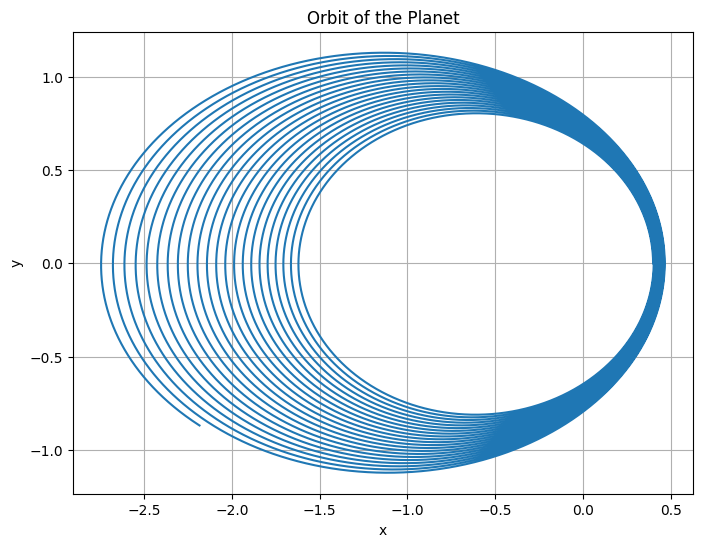

In [39]:
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

q = np.zeros((num_steps+1, 2))
p = np.zeros((num_steps+1, 2))

q[0] = [1 - e, 0]
p[0] = [0, np.sqrt((1 + e) / (1 - e))]

for n in range(num_steps):
    q1, q2 = q[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotdot = -q1 / q_mag**3
    q2_dotdot = -q2 / q_mag**3

    q[n+1] = q[n] + dt * p[n]
    p[n+1] = p[n] + dt * np.array([q1_dotdot, q2_dotdot])

x = q[:, 0]
y = q[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title("Planet Orbit")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## B)
Using 400000 steps, use the symplectic Euler method.

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$.


Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure.

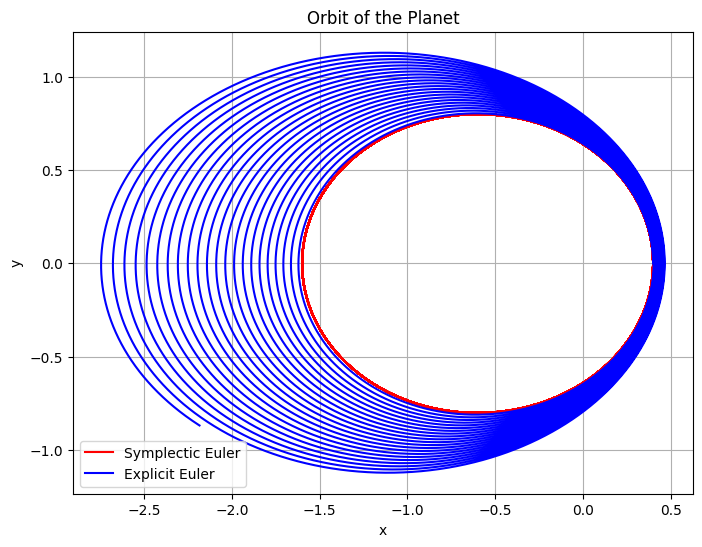

In [38]:
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

q_symplectic = np.zeros((num_steps+1, 2))
p_symplectic = np.zeros((num_steps+1, 2))

q_explicit = np.zeros((num_steps+1, 2))
p_explicit = np.zeros((num_steps+1, 2))

q_symplectic[0] = [1 - e, 0]
p_symplectic[0] = [0, np.sqrt((1 + e) / (1 - e))]

q_explicit[0] = [1 - e, 0]
p_explicit[0] = [0, np.sqrt((1 + e) / (1 - e))]

for n in range(num_steps):
    q1, q2 = q_symplectic[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotq1s = q1 / q_mag**3
    q2_dotq2s = q2 / q_mag**3

    p_symplectic[n+1] = p_symplectic[n] - dt * np.array([q1_dotq1s, q2_dotq2s])
    q_symplectic[n+1] = q_symplectic[n] + dt * p_symplectic[n+1]

for n in range(num_steps):
    q1, q2 = q_explicit[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotq1e = -q1 / q_mag**3
    q2_dotq2e = -q2 / q_mag**3

    p_explicit[n+1] = p_explicit[n] + dt * np.array([q1_dotq1e, q2_dotq2e])
    q_explicit[n+1] = q_explicit[n] + dt * p_explicit[n]

x_symplectic = q_symplectic[:, 0]
y_symplectic = q_symplectic[:, 1]

x_explicit = q_explicit[:, 0]
y_explicit = q_explicit[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x_symplectic, y_symplectic, color='r', label='Symplectic Euler')
plt.plot(x_explicit, y_explicit, color='b', label='Explicit Euler')
plt.title("Planet Orbit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
